In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats
import cv2

##Importando as bibliotecas utilizadas

In [5]:
df = pd.read_csv('C:\\Users\\rhuan\\OneDrive\\Área de Trabalho\\COLAB\\Sistemas Inteligentes\\tibia.csv')
df

,HP,XP,MaxGold,Name
0,7350,4650,999,Dark Torturer
1,8200,6000,700,Demon
2,20000,11200,1694,Juggernaut
3,9500,7216,997,Grimeleech
4,14000,11000,1282,Hellflayer
5,8500,6248,982,Vexclaw
6,5300,4700,1100,Crazed Summer Rearguard
7,5500,5000,1300,Crazed Summer Vanguard
8,4000,2500,636,Behemoth
9,3500,1760,600,Breach Brood


##Importando o dataset para um dataframe do pandas

In [6]:
X = df.iloc[:,0:2].values
np.array(X)
X = stats.zscore(X)
X

array([[ 0.41437845,  0.12913526],
       [ 0.65393411,  0.70837345],
       [ 3.97953036,  2.93951317],
       [ 1.02031336,  1.23011689],
       [ 2.28854922,  2.8537001 ],
       [ 0.73848317,  0.81478165],
       [-0.16337344,  0.15058852],
       [-0.1070074 ,  0.27930812],
       [-0.52975269, -0.7933552 ],
       [-0.67066778, -1.11086355],
       [-0.38883759, -0.83626174],
       [-0.5579357 , -0.80193651],
       [-0.89613193, -1.21383923],
       [-0.98068099, -1.11300887],
       [-0.36065457, -0.62172907],
       [-0.6988508 , -0.75044867],
       [-0.47338665, -0.36428987],
       [ 0.85121525,  0.64401365],
       [ 0.17482279,  0.70837345],
       [-0.38883759, -0.06394414],
       [-0.5579357 , -0.06394414],
       [-0.2479225 ,  0.15058852],
       [ 0.45665298,  0.27930812],
       [-1.34706024, -1.3082336 ],
       [ 0.10436524, -0.23557027],
       [-0.09291589, -0.06394414],
       [-0.2479225 , -0.53591601],
       [-0.48747816, -0.83626174],
       [-0.9947725 ,

##Atribuindo a matriz X as variáveis categóricas, e então as padronizando via Z-Score

In [7]:
Y = df['MaxGold'].values
np.array(Y)
Y = stats.zscore(Y)
Y

array([ 0.5013589 , -0.5190627 ,  2.87324187,  0.49453333,  1.46717599,
        0.44334162,  0.8460498 ,  1.52860605, -0.7374807 , -0.86034082,
        0.16349355, -0.5190627 , -1.54289708, -1.29376404,  0.49453333,
       -0.17778457,  0.5730273 , -0.52247548, -1.54289708, -1.20161895,
       -1.20161895,  1.86988418,  0.3921499 , -0.17778457,  0.4467544 ,
        0.47064387, -0.5190627 , -0.5190627 , -1.03097989, -0.18461014,
       -0.17778457,  0.16349355])

##Atribuindo a o vetor Y a variável alvo, e então a padronizando via Z-Score
*embora para vetores, o padrão seja utilizar letra minuscula, deixei maiuscula devido ao zip para ficar mais didático*


(-0.5, 782.5, 788.5, -0.5)

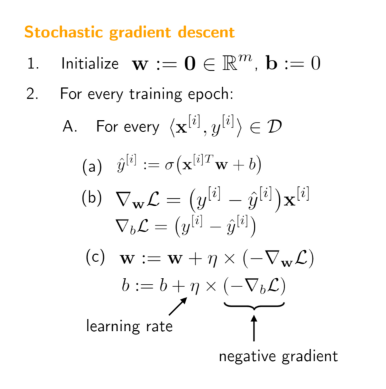

In [8]:
img = cv2.imread('GD.png')
plt.imshow(img)
plt.axis('off')

##O método utilizado será o Gradiente Descendente (modo online). O código irá seguir o pseudocódigo acima

*Fonte: Slides do professor Dalcimar Casanova*

In [96]:
w = np.array([0,0])  #iniciando os pesos em 0
y_vector = []  #vetor que vai receber os y_preds
mae = []  #vetor que armazenará os MAE's
mse = []  #vetor que armazenará os MSE's
b= np.array([0])  #iniciando BIAS em 0
lr = 0.001  #learning rate
mae_v = []  #armazenando o vetor com melhor score de MAE
mse_v = []  ##armazenando o vetor com melhor score de MSE
for n in range (10):  #range = número de epocas
  for x,y in zip(X,Y):  #abrindo a matriz e vetores originais
    y_pred = np.dot(x.T, w) + b
    y_vector.append(y_pred[0])  #por ser um np.array, sempre de valor único, pego apenas seu valor ao utilizar o indice 0
    errw = ((y_pred-y)*x)  #erro dos pesos
    errb = y_pred-y  #erro do bias
    w = w - lr*errw  #ajuste dos pesos
    b = b - lr*errb  #ajuste do bias
  check_mae = mean_absolute_error(Y,y_vector)  #calculo do mae
  check_mse = mean_squared_error(Y,y_vector)  #calculo do mse
  if len(mae) > 0 and check_mae < mae[-1]:  #condição para se armazenar o vetor com melhor score de MAEs
    mae_v = y_vector.copy()
  if len(mse) > 0 and check_mse < mse[-1]:  #condição para se armazenar o vetor com melhor score de MSEs
    mse_v = y_vector.copy()
  mae.append(check_mae)  #armazena o score da mae em uma lista
  mse.append(check_mse)  #armazena o score da mse em uma lista
  y_vector.clear()

In [97]:
print(mse_v)
print(mae_v)

[0.07757947927462475, 0.190079394683203, 0.9633243753160864, 0.3274083819116335, 0.745727486541108, 0.23120441809976705, -0.000262100477268806, 0.02745893102817525, -0.18771223724954675, -0.25552757646762736, -0.17462694401849882, -0.1950290883066791, -0.30648054448367473, -0.3090342140073842, -0.14419189968278215, -0.2144526936335234, -0.12329738353510543, 0.2290782581307777, 0.13236037341395737, -0.06767942962819974, -0.09511594937190877, -0.017719354183451327, 0.11178658231441428, -0.3952508406011, -0.016142449307206024, -0.02153184135342351, -0.11262782842896818, -0.19332315132884417, -0.2909710137709961, -0.11474225070098898, 0.12924758664973252, 0.0261225664630254]
[0.07757947927462475, 0.190079394683203, 0.9633243753160864, 0.3274083819116335, 0.745727486541108, 0.23120441809976705, -0.000262100477268806, 0.02745893102817525, -0.18771223724954675, -0.25552757646762736, -0.17462694401849882, -0.1950290883066791, -0.30648054448367473, -0.3090342140073842, -0.14419189968278215, -0.

##Os vetores com melhores scores de MSE e MAE respectivamente. Nota-se que são iguais

In [98]:
best_mse = min(mse)
best_mse_index = np.argmin(mse)
print(best_mse)
best_mae = min(mae)
best_mae_index = np.argmin(mae)
print(best_mae)

0.7230376047149804
0.6842132064550352


Melhores scores de MSE e MAE, respectivamente

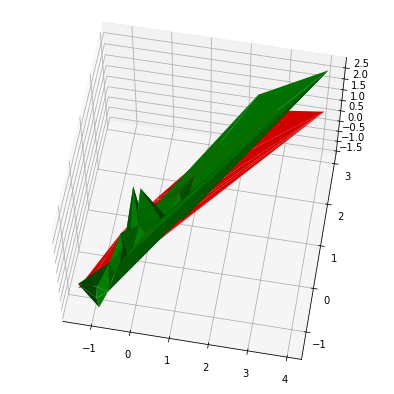

In [99]:
fig = plt.figure(figsize=(20,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], mse_v,color = 'red')
ax.plot_trisurf(X[:,0], X[:,1], Y, color = 'green')
ax.view_init(elev=60, azim=-80)

plt.show()

##É gerada uma imagem com as superfícies, sendo que em verde temos a original, e em vermelho a estimada com o melhor MSE encontrado. Como os vetores que obtiveram os melhores scores MAE e MSE foram iguais, não há a necessidade de um segundo plot.